In [1]:
import sys
import pathlib
import numpy as np
import pandas as pd
import plotnine as p9
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import warnings

warnings.filterwarnings("ignore")
sys.path.insert(0, "../0.data-download/scripts/")
from data_loader import load_data, load_train_test_data

In [2]:
# data path
data_directory = "../0.data-download/data/"

In [3]:
# load the training data
dfs_test, dfs, data = load_train_test_data(
    data_directory, train_or_test="all", load_gene_stats=False
)

In [4]:
# set a unique dataframe that can be appended from
training_df_age = dfs

# group by age and create new dataframes that can be appended to
groups = training_df_age.groupby("age_and_sex")
adult_effect_df = pd.DataFrame()
ped_effect_df = pd.DataFrame()
for name, training_df_age in groups:

    # append rows that contain Adult samples (male or female) to the new adult effect dataframe
    if name == "Adult_Male" or name == "Adult_Female" or name == "Adult_nan":
        adult_effect_df = adult_effect_df._append(training_df_age)
        adult_effect_df = adult_effect_df.reset_index(drop=True)

    # append rows that contain Pediatric samples (male ore female) to the new pediatric dataframe
    else:
        ped_effect_df = ped_effect_df._append(training_df_age)
        ped_effect_df = ped_effect_df.reset_index(drop=True)

In [5]:
# set a unique dataframe that can be appended from
training_df_sex = dfs

# group by sex and create new dataframes to be appended to
groups_sex = training_df_sex.groupby("age_and_sex")
male_effect_df = pd.DataFrame()
female_effect_df = pd.DataFrame()
for name, training_df_sex in groups_sex:

    # append rows that contain Male samples (Adult or Pediatric) to the new male effect dataframe and filter out samples that contain no gender info
    if (
        name == "Adult_Male"
        or name == "Pediatric_Male"
        and name != "Pediatric_nan"
        and name != "Adult_nan"
    ):
        male_effect_df = male_effect_df._append(training_df_sex)
        male_effect_df = male_effect_df.reset_index(drop=True)

    # append rows that contain Female samples (Adult or Pediatric) to the new female effect dataframe and filter out samples that contain no gender info
    elif (
        name == "Adult_Female"
        or name == "Pediatric_Female"
        and name != "Pediatric_nan"
        and name != "Adult_nan"
    ):
        female_effect_df = female_effect_df._append(training_df_sex)
        female_effect_df = female_effect_df.reset_index(drop=True)

In [6]:
print(adult_effect_df.shape)
adult_effect_df.head(3)

(116, 17204)


,ModelID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009),age_and_sex
0,ACH-002020,-0.017063,-0.050862,0.094906,0.154866,-0.095133,-0.039609,-0.059752,-0.258218,0.004383,...,-1.052064,0.153793,0.234804,-0.037593,-0.011721,-0.173295,-0.063854,-0.126164,-0.321628,Adult_Female
1,ACH-000527,-0.066150,-0.038337,0.114164,0.036317,-0.117212,0.066980,0.054684,-0.205438,0.005391,...,-0.650313,0.118449,0.027224,-0.149328,-0.051599,-0.000322,-0.141356,-0.144828,-0.439437,Adult_Female
2,ACH-001623,-0.023935,-0.032556,-0.001804,0.145947,-0.136503,0.050569,0.069299,-0.227384,0.165197,...,-0.870093,0.012428,-0.424677,-0.066837,-0.218717,-0.311509,0.091700,-0.084856,-0.450426,Adult_Female


In [7]:
print(ped_effect_df.shape)
ped_effect_df.head(3)

(21, 17204)


,ModelID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009),age_and_sex
0,ACH-001618,-0.067818,-0.227855,0.019062,-0.064588,-0.108135,0.063899,0.416703,0.051042,-0.058059,...,-0.132810,-0.128365,-0.031623,-0.029547,0.108570,-0.425476,-0.141151,-0.219427,-0.020476,Adult_Unknown
1,ACH-001322,0.095628,-0.160226,0.122865,0.008947,-0.148518,0.019983,0.140906,-0.206059,0.003251,...,-0.621286,0.026562,-0.138207,-0.018001,-0.187776,-0.036157,-0.107037,-0.122514,-0.484219,Pediatric_Female
2,ACH-001212,-0.117333,-0.078848,0.258217,0.286754,-0.174419,-0.008043,0.226221,-0.312040,-0.016804,...,-0.290700,-0.023899,-0.054165,0.120583,-0.028658,-0.304744,0.015440,-0.672782,-0.448565,Pediatric_Female


In [8]:
print(male_effect_df.shape)
male_effect_df.head(3)

(77, 17204)


,ModelID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009),age_and_sex
0,ACH-000848,-0.095804,-0.066932,0.181376,0.180267,-0.169228,-0.126272,-0.024669,-0.494615,-0.020542,...,-0.525709,-0.042524,0.124146,0.139852,-0.163546,-0.054839,0.140544,-0.122381,-0.188504,Adult_Male
1,ACH-001375,-0.017543,-0.019509,0.138995,0.118517,-0.348495,-0.114798,0.150456,-0.225682,-0.046850,...,-0.869698,0.062804,0.260085,-0.185668,-0.095176,0.078490,0.039893,-0.322191,-0.439516,Adult_Male
2,ACH-000684,0.017761,-0.041577,-0.024693,0.166967,0.031182,0.045336,-0.022942,-0.195495,-0.108759,...,-0.555852,0.191322,0.009278,0.180951,-0.001055,-0.394817,-0.259348,-0.124322,-0.137619,Adult_Male


In [9]:
print(female_effect_df.shape)
female_effect_df.head(3)

(58, 17204)


,ModelID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009),age_and_sex
0,ACH-002020,-0.017063,-0.050862,0.094906,0.154866,-0.095133,-0.039609,-0.059752,-0.258218,0.004383,...,-1.052064,0.153793,0.234804,-0.037593,-0.011721,-0.173295,-0.063854,-0.126164,-0.321628,Adult_Female
1,ACH-000527,-0.066150,-0.038337,0.114164,0.036317,-0.117212,0.066980,0.054684,-0.205438,0.005391,...,-0.650313,0.118449,0.027224,-0.149328,-0.051599,-0.000322,-0.141356,-0.144828,-0.439437,Adult_Female
2,ACH-001623,-0.023935,-0.032556,-0.001804,0.145947,-0.136503,0.050569,0.069299,-0.227384,0.165197,...,-0.870093,0.012428,-0.424677,-0.066837,-0.218717,-0.311509,0.091700,-0.084856,-0.450426,Adult_Female


In [10]:
# drop the string values from all dataframes
adult_effect_df_float = adult_effect_df.drop(
    columns=["ModelID", "age_and_sex"]
)
ped_effect_df_float = ped_effect_df.drop(columns=["ModelID", "age_and_sex"])

male_effect_df_float = male_effect_df.drop(columns=["ModelID", "age_and_sex"])
female_effect_df_float = female_effect_df.drop(
    columns=["ModelID", "age_and_sex"]
)

effect_df = dfs.drop(columns="age_and_sex")
effect_df = effect_df.set_index("ModelID")

In [11]:
# t_test comparing gene dependencies in adult vs pediatric samples
t_test = ttest_ind(adult_effect_df_float, ped_effect_df_float)
t_test = pd.DataFrame(t_test).T
t_test.columns = ["t_stat", "p_value"]
print(t_test.shape)
t_test.head(3)

(17202, 2)


,t_stat,p_value
0,0.274618,0.784030
1,-0.865167,0.388482
2,-0.767535,0.444104


In [12]:
# t_test comparing gene dependencies in male vs female samples
t_test_sex = ttest_ind(male_effect_df_float, female_effect_df_float)
t_test_sex = pd.DataFrame(t_test_sex).T
t_test_sex.columns = ["t_stat", "p_value"]
print(t_test_sex.shape)
t_test_sex.head(3)

(17202, 2)


,t_stat,p_value
0,0.068335,0.945621
1,1.314097,0.191075
2,-0.263318,0.792713


In [13]:
print(effect_df.shape)
effect_df.head(3)

(137, 17202)


,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),AADAC (13),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
ModelID,,,,,,,,,,,,,,,,,,,,,
ACH-000848,-0.095804,-0.066932,0.181376,0.180267,-0.169228,-0.126272,-0.024669,-0.494615,-0.020542,0.145658,...,-0.079394,-0.525709,-0.042524,0.124146,0.139852,-0.163546,-0.054839,0.140544,-0.122381,-0.188504
ACH-002020,-0.017063,-0.050862,0.094906,0.154866,-0.095133,-0.039609,-0.059752,-0.258218,0.004383,0.179183,...,-0.129544,-1.052064,0.153793,0.234804,-0.037593,-0.011721,-0.173295,-0.063854,-0.126164,-0.321628
ACH-000527,-0.066150,-0.038337,0.114164,0.036317,-0.117212,0.066980,0.054684,-0.205438,0.005391,0.103483,...,-0.316360,-0.650313,0.118449,0.027224,-0.149328,-0.051599,-0.000322,-0.141356,-0.144828,-0.439437


In [14]:
# calculate variance of each gene then send the results plus the gene info into a new dataframe
variance = effect_df.var()
variance_list = variance.tolist()
column_names = ["variance"]
variance_df = pd.DataFrame(variance, columns=column_names)
variance_df = variance_df.sort_index(ascending=True).reset_index()
variance_df = variance_df.rename(columns={"index": "gene_ID"})
print(variance_df.shape)
variance_df.head(3)

(17202, 2)


,gene_ID,variance
0,A1BG (1),0.009276
1,A1CF (29974),0.014807
2,A2M (2),0.010418


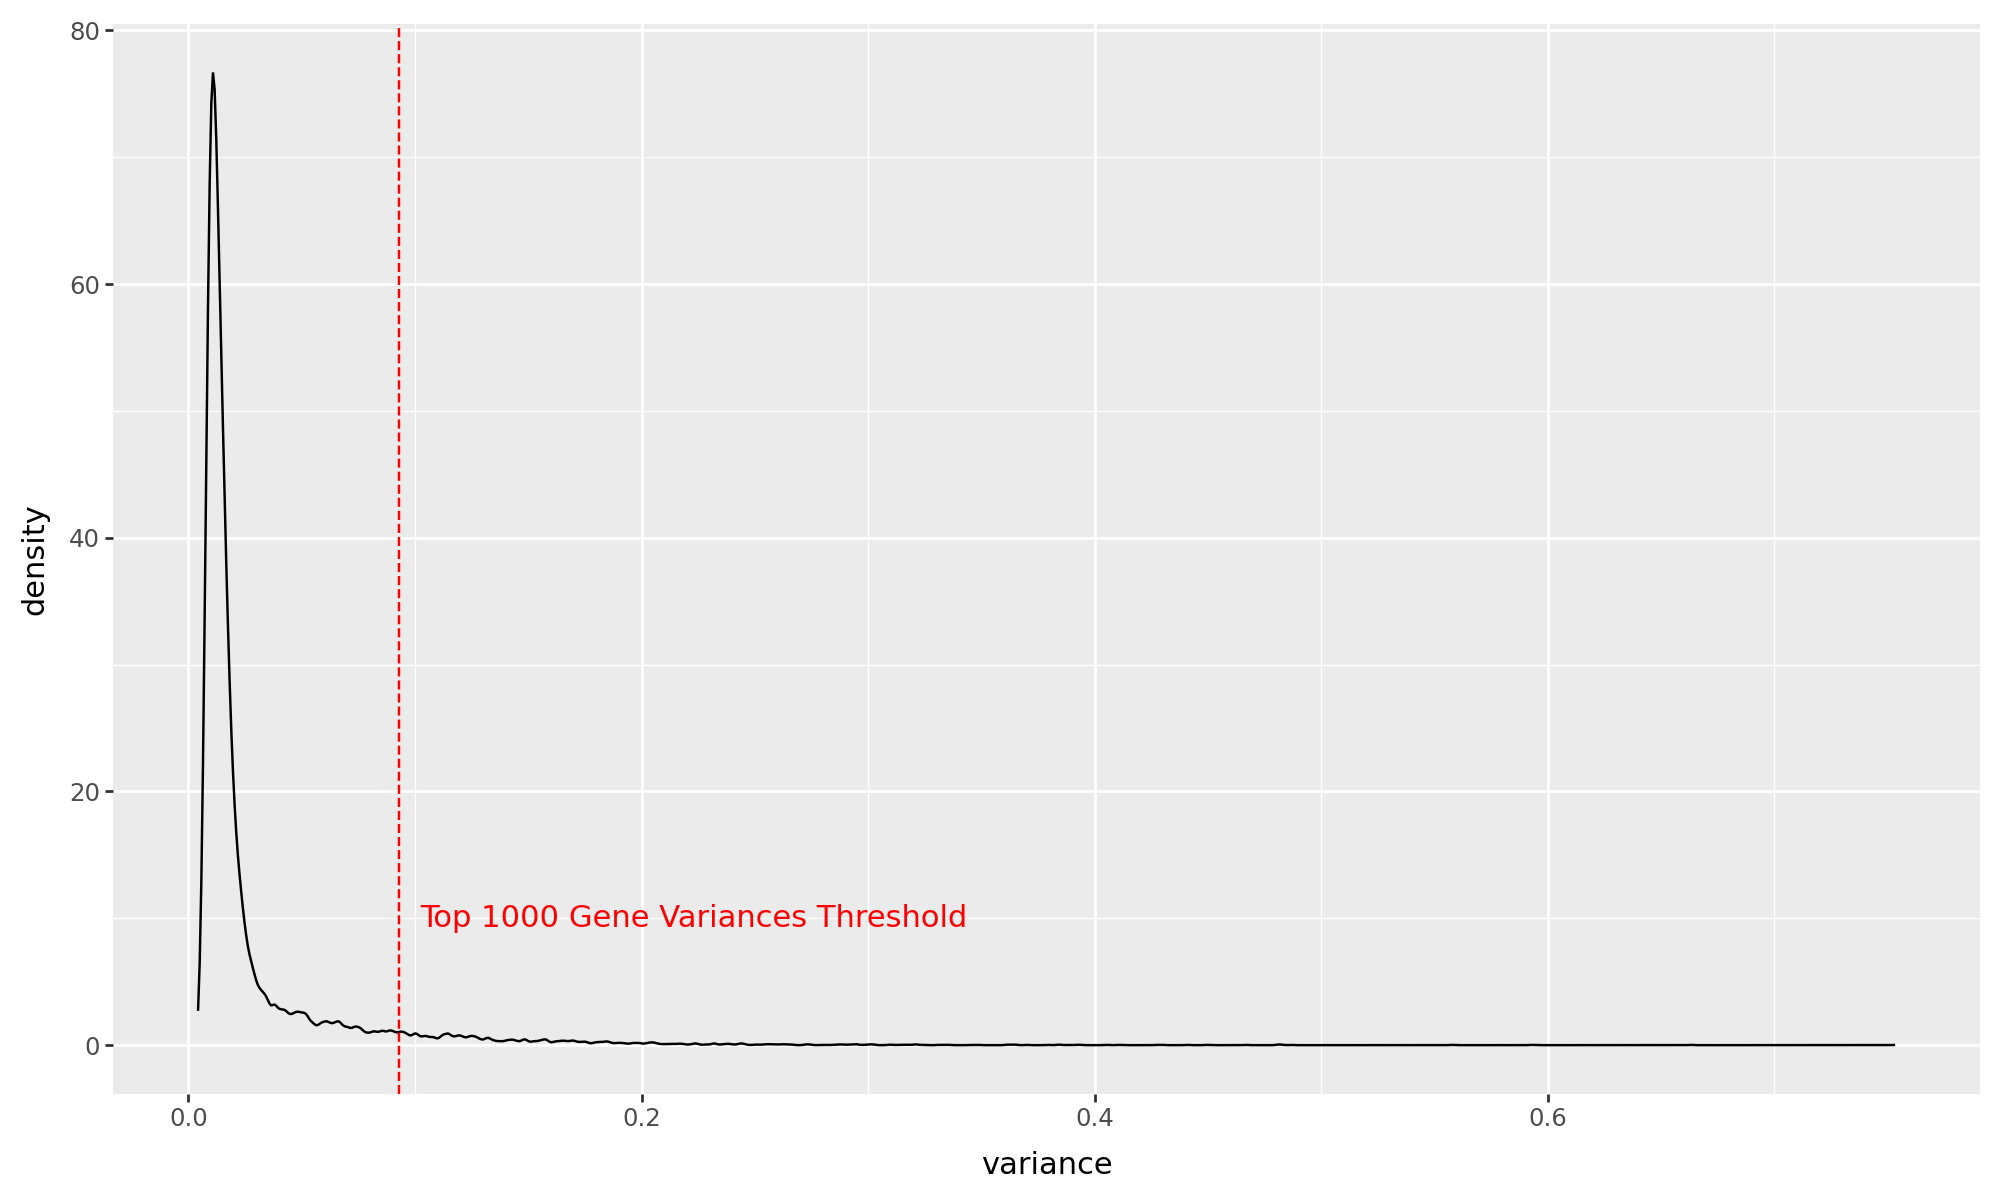

In [21]:
# finding the smallest gene variation out of the 1000 largest gene variations to set the top 1000 gene variances threshold
n = variance_df["variance"].nlargest(1000)
variance_threshold = n.astype(float).min()

# plotting variance density chart and marking the 1000 largest gene variation cutoff
variance_density_plot = (
    p9.ggplot(variance_df, p9.aes(x="variance"))
    + p9.geom_density()
    + p9.geom_vline(xintercept=variance_threshold, linetype="dashed", color="red")
    + p9.annotate(geom="text", x=variance_threshold + 0.13, y = 10, label="Top 1000 Gene Variances Threshold", color="red") 
    + p9.theme(figure_size=(10, 6))
)

# save the figure
density_path = pathlib.Path("./figures/variance_density_plot.png")
variance_density_plot.save(density_path)
variance_density_plot

In [16]:
# first create new dataframe containing gene info as well as both adult-pediatric and male-female t-test results and variance results
df = variance_df.assign(
    ttest_A_vs_P=t_test.t_stat.astype(float),
    ttest_M_vs_F=t_test_sex.t_stat.astype(float),
)

# and save the new dataframe as a .csv
testing_df_output = pathlib.Path(
    "../0.data-download/data/genes_variances_and_t-tests_df.csv"
)
df.to_csv(testing_df_output, index=False)
print(df.shape)
df.head(3)

(17202, 4)


,gene_ID,variance,ttest_A_vs_P,ttest_M_vs_F
0,A1BG (1),0.009276,0.274618,0.068335
1,A1CF (29974),0.014807,-0.865167,1.314097
2,A2M (2),0.010418,-0.767535,-0.263318


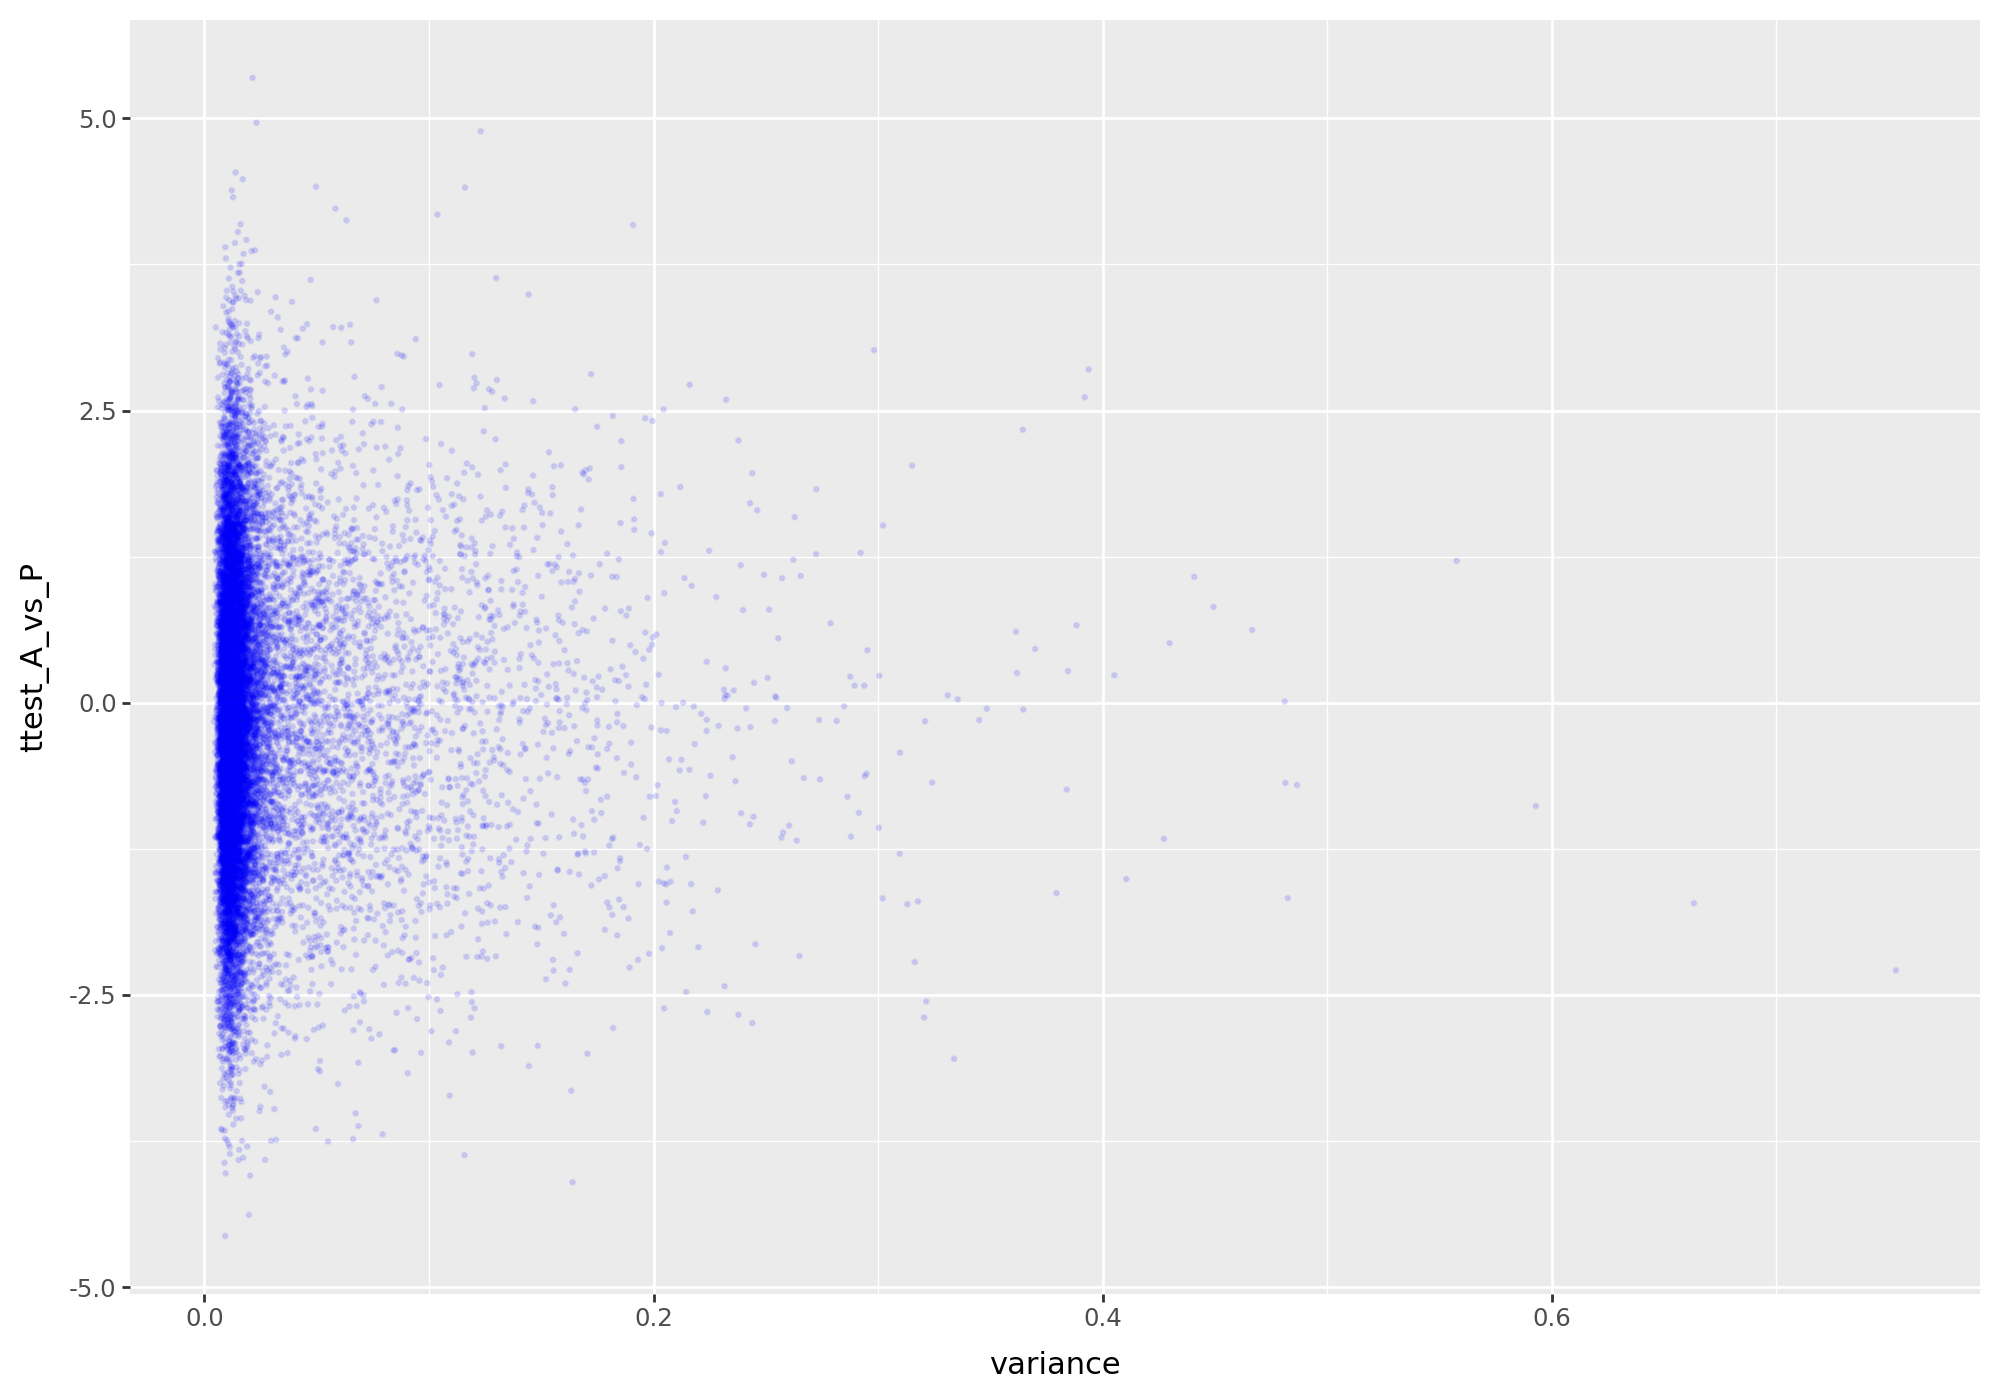

In [17]:
# plot adult-pediatric ttest versus variance
A_vs_P_by_variance_plot = (
    p9.ggplot(data=df, mapping=p9.aes(x="variance", y="ttest_A_vs_P"))
    + p9.geom_point(size=0.4, alpha=0.1, color="blue")
    + p9.theme(figure_size=(10, 7))
)

# save the figure
adult_vs_pediatric_path = pathlib.Path(
    "./figures/adult-pediatric_ttest_vs_variance.png"
)
A_vs_P_by_variance_plot.save(adult_vs_pediatric_path)
A_vs_P_by_variance_plot

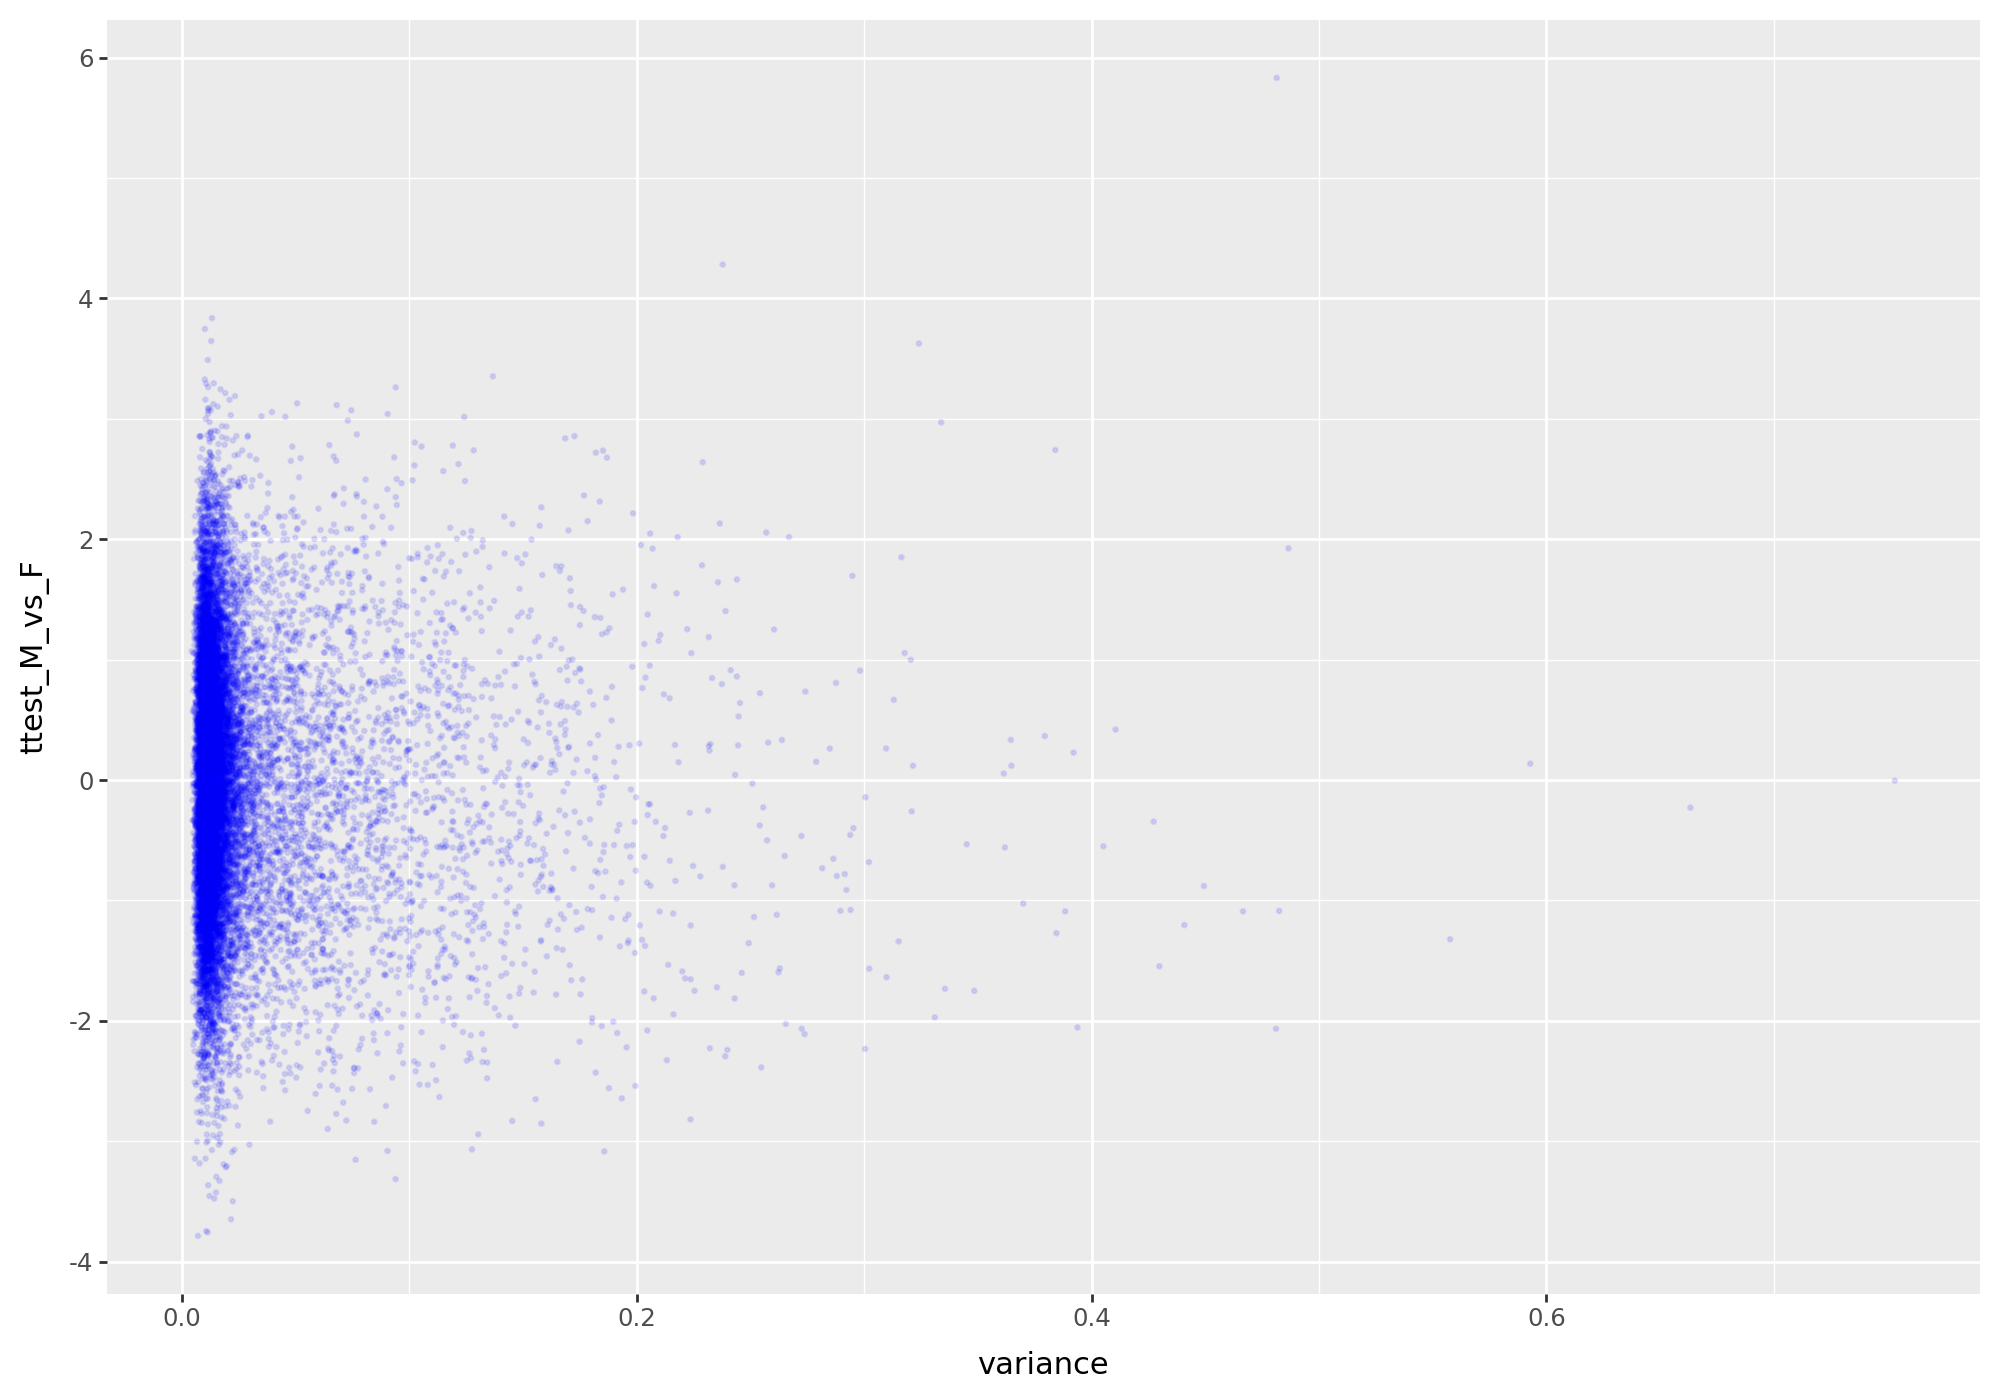

In [18]:
# plot male-female ttest versus gene variance
M_vs_F_by_variance_plot = (
    p9.ggplot(data=df, mapping=p9.aes(x="variance", y="ttest_M_vs_F"))
    + p9.geom_point(size=0.4, alpha=0.1, color="blue")
    + p9.theme(figure_size=(10, 7))
)

# save the figure
male_vs_female_path = pathlib.Path("./figures/male-female_ttest_vs_variance.png")
M_vs_F_by_variance_plot.save(male_vs_female_path)
M_vs_F_by_variance_plot